# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

%matplotlib inline

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 75
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [8]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 0, 1], 4:[0, 1, 0]}
    
    # retrieve dataset size
    n_data = len(list(batch))
    
    # loop through images. Plot image and its corresponding bounding boxes
    for sample in batch:
        
        # retrieve image data, boxes data and class data for each bounding box 
        img = sample['image'].numpy()
        boxes = sample['groundtruth_boxes'].numpy()
        classes = sample['groundtruth_classes'].numpy()
        
        # show image
        fig, ax = plt.subplots(1,1, figsize = (8,8))
        
        
        # add bounding boxes
        for cl, bb in zip(classes, boxes):
            # calculate coordinate of bounding box
            y1, x1, y2, x2 = bb
            y1 = y1*img.shape[0]
            x1 = x1*img.shape[1]
            y2 = y2*img.shape[0]
            x2 = x2*img.shape[1]

            # create bounding box variable
            rec = Rectangle((x1,y1), x2-x1, y2-y1, facecolor = 'none', edgecolor = colormap[cl])
            
            # add rec to image
            ax.add_patch(rec)
            
        # set image property
        ax.imshow(img)
        ax.axis('off')
        plt.show()

    # ADD CODE HERE

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

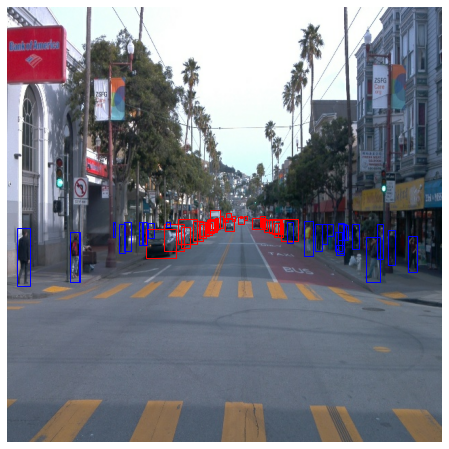

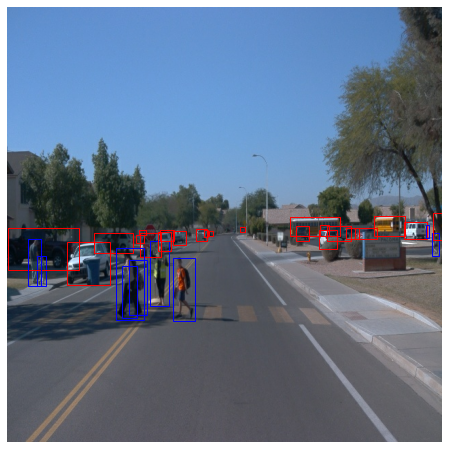

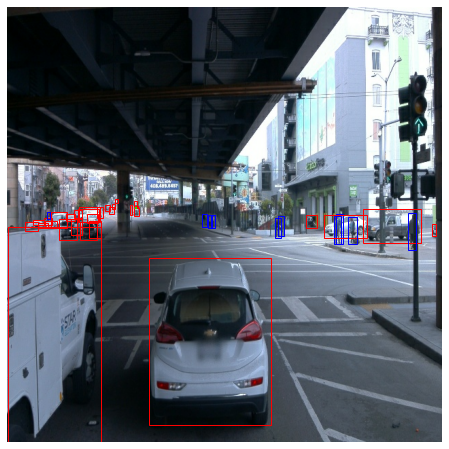

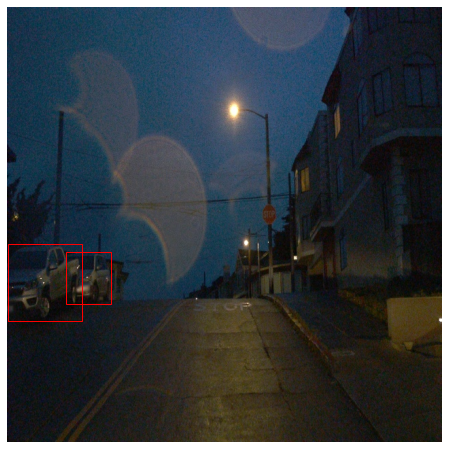

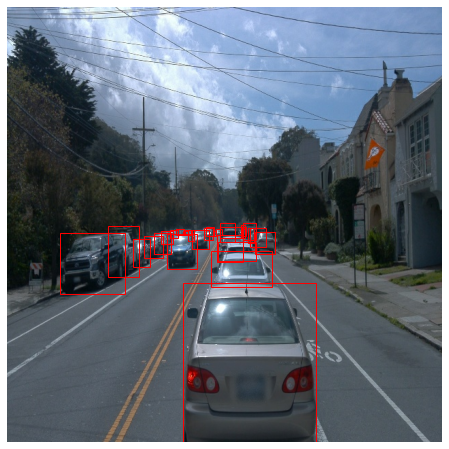

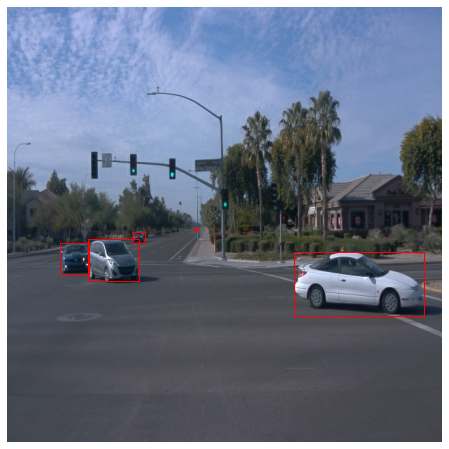

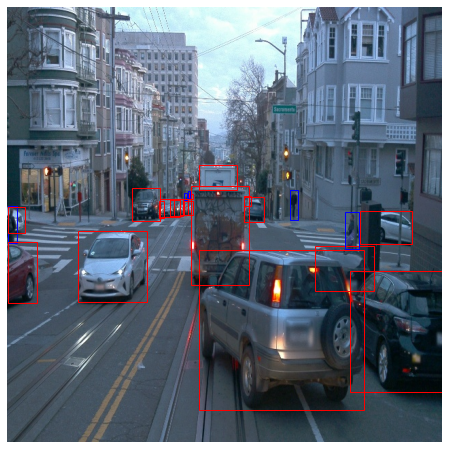

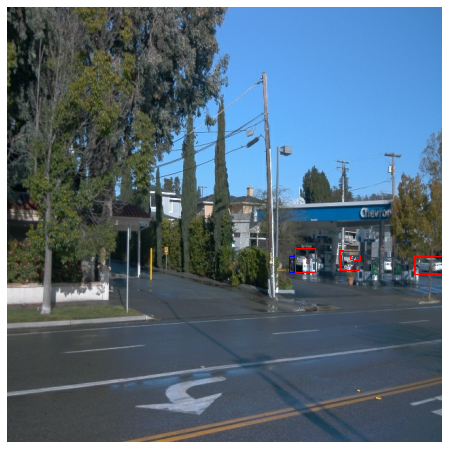

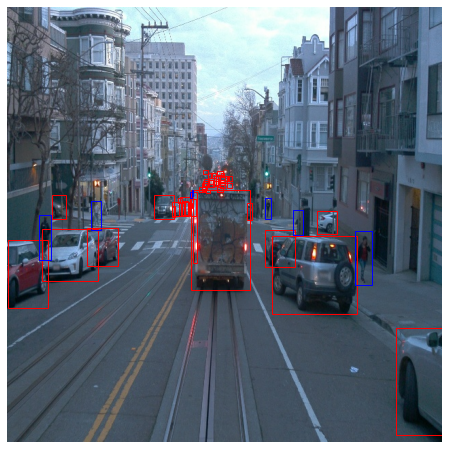

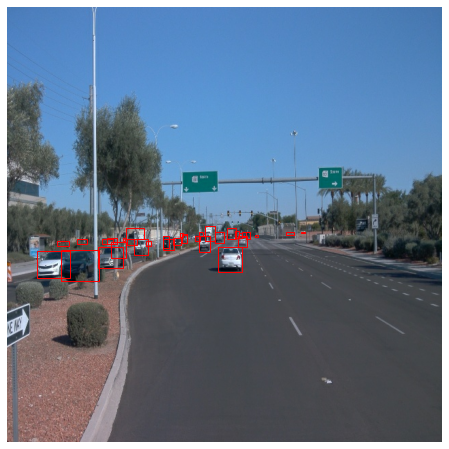

In [9]:
## STUDENT SOLUTION HERE
batch = dataset.shuffle(75).take(10)
display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [19]:
## STUDENT SOLUTION HERE
# calculate class distribution in training dataset
n_data = 20000
batch = dataset.take(20000)
counts = {1:0, 2:0, 4:0}


for sample in batch:
    label_image = sample['groundtruth_classes'].numpy()
    for l in label_image:
        counts[l] += 1

vehicle percentage = 0.7728970862764011
pedestrian percentage = 0.2204756751268567
cyclist percentage = 0.006627238596742223


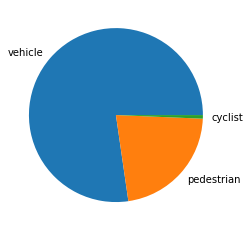

In [27]:
# plot pie graph
classes = ['vehicle', 'pedestrian', 'cyclist']
plt.pie([counts[1], counts[2], counts[4]], labels = classes)

# calculate distribution percentage
dist = np.array([counts[1], counts[2], counts[4]]) / (counts[1]+counts[2]+counts[4])
print("vehicle percentage =", dist[0])
print("pedestrian percentage =", dist[1])
print("cyclist percentage =", dist[2])

# observation:
1. Most images don't include bicycle
2. The whole training set includes 77% vehicle, 22% pedestrian and less than 1% cyclist